## STEP 1: Load Datasets

In [1]:
#importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [2]:
# Load your datasets
games_df = pd.read_csv("Games.csv")
players_df = pd.read_csv("Players.csv")

In [3]:
# Preview each dataset
display(games_df.head(), players_df.head())

,gameId,gameDate,hometeamCity,hometeamName,hometeamId,awayteamCity,awayteamName,awayteamId,homeScore,awayScore,winner,gameType,attendance,arenaId,gameLabel,gameSubLabel,seriesGameNumber
0,42400407,2025-06-22 20:00:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,103,91,1610612760,Playoffs,18203.0,1000052,NBA Finals,Game 7,7.0
1,42400406,2025-06-19 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,108,91,1610612754,Playoffs,17274.0,1000063,NBA Finals,Game 6,6.0
2,42400405,2025-06-16 20:30:00,Oklahoma City,Thunder,1610612760,Indiana,Pacers,1610612754,120,109,1610612760,Playoffs,18203.0,1000052,NBA Finals,Game 5,5.0
3,42400404,2025-06-13 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,104,111,1610612760,Playoffs,17274.0,1000063,NBA Finals,Game 4,4.0
4,42400403,2025-06-11 20:30:00,Indiana,Pacers,1610612754,Oklahoma City,Thunder,1610612760,116,107,1610612754,Playoffs,17274.0,1000063,NBA Finals,Game 3,3.0


,personId,firstName,lastName,birthdate,lastAttended,country,height,bodyWeight,guard,forward,center,draftYear,draftRound,draftNumber
0,2,Byron,Scott,1961-03-28,Arizona State,USA,76.0,205.0,True,False,False,1983.0,1.0,4.0
1,3,Grant,Long,1966-03-12,Eastern Michigan,USA,81.0,3.0,False,False,False,1988.0,2.0,33.0
2,7,Dan,Schayes,1959-05-10,Syracuse,USA,83.0,260.0,False,False,True,1981.0,1.0,13.0
3,9,Sedale,Threatt,1961-09-10,West Virginia Tech,USA,74.0,185.0,True,False,False,1983.0,6.0,139.0
4,12,Chris,King,1969-07-24,Wake Forest,USA,80.0,215.0,False,True,False,1992.0,2.0,45.0


## STEP 2: Exploratory Data Analysis (EDA)

In [4]:
# Quick look at structure
print("Games.csv Overview:")
print(games_df.shape)
print(games_df.info())
print(games_df.head())

print("\nPlayers.csv Overview:")
print(players_df.shape)
print(players_df.info())
print(players_df.head())

Games.csv Overview:
(71879, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71879 entries, 0 to 71878
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gameId            71879 non-null  int64  
 1   gameDate          71879 non-null  object 
 2   hometeamCity      71879 non-null  object 
 3   hometeamName      71879 non-null  object 
 4   hometeamId        71879 non-null  int64  
 5   awayteamCity      71879 non-null  object 
 6   awayteamName      71879 non-null  object 
 7   awayteamId        71879 non-null  int64  
 8   homeScore         71879 non-null  int64  
 9   awayScore         71879 non-null  int64  
 10  winner            71879 non-null  int64  
 11  gameType          71879 non-null  object 
 12  attendance        66850 non-null  float64
 13  arenaId           71879 non-null  int64  
 14  gameLabel         3792 non-null   object 
 15  gameSubLabel      158 non-null    object 
 16  seriesGa

## Data Cleaning and Descriptive Statistics

In [5]:
# Check for null values
print(games_df.isnull().sum())
print(players_df.isnull().sum())

# Drop rows with too many missing values or fill where appropriate
games_df = games_df.dropna(thresh=3)
players_df = players_df.dropna(thresh=3)

# Standardize date and text formatting

## First lowercase and clean column names
games_df.columns = games_df.columns.str.strip().str.lower()
players_df.columns = players_df.columns.str.strip().str.lower()

## Now apply date conversion using the correct column name
games_df['gamedate'] = pd.to_datetime(games_df['gamedate'], errors='coerce')

gameId                  0
gameDate                0
hometeamCity            0
hometeamName            0
hometeamId              0
awayteamCity            0
awayteamName            0
awayteamId              0
homeScore               0
awayScore               0
winner                  0
gameType                0
attendance           5029
arenaId                 0
gameLabel           68087
gameSubLabel        71721
seriesGameNumber    66141
dtype: int64
personId           0
firstName          1
lastName           2
birthdate       1856
lastAttended    1879
country         1856
height          2079
bodyWeight      1953
guard           1430
forward         1430
center          1430
draftYear       1856
draftRound      2017
draftNumber     2075
dtype: int64


In [6]:
## Numeric summary
print(games_df.describe())
print(players_df.describe())
## Categorical values
# Top Home Team Cities
print("Top Home Team Cities:")
print(games_df['hometeamcity'].value_counts().head(10))

# Top Away Team Cities
print("\nTop Away Team Cities:")
print(games_df['awayteamcity'].value_counts().head(10))

# Top Players (combine first + last name)
players_df['player_name'] = players_df['firstname'].fillna('') + ' ' + players_df['lastname'].fillna('')
print("\nTop Registered Players:")
print(players_df['player_name'].value_counts().head(10))


             gameid                       gamedate    hometeamid  \
count  7.187900e+04                          71879  7.187900e+04   
mean   2.583156e+07  1996-08-02 09:21:09.712155136  1.610613e+09   
min    1.030000e+07            1946-11-26 19:00:00  1.610613e+09   
25%    2.130058e+07            1982-11-12 20:00:00  1.610613e+09   
50%    2.630022e+07            1999-02-09 20:30:00  1.610613e+09   
75%    2.870060e+07            2012-04-22 18:00:00  1.610613e+09   
max    6.240000e+07            2025-06-22 20:00:00  1.610613e+09   
std    6.420623e+06                            NaN  8.660615e+00   

         awayteamid     homescore     awayscore        winner     attendance  \
count  7.187900e+04  71879.000000  71879.000000  7.187900e+04   66850.000000   
mean   1.610613e+09    105.849288    102.272291  1.610613e+09   14972.900419   
min    1.610613e+09      0.000000      0.000000  1.610613e+09       9.000000   
25%    1.610613e+09     96.000000     93.000000  1.610613e+09   119

## Visual Analysis

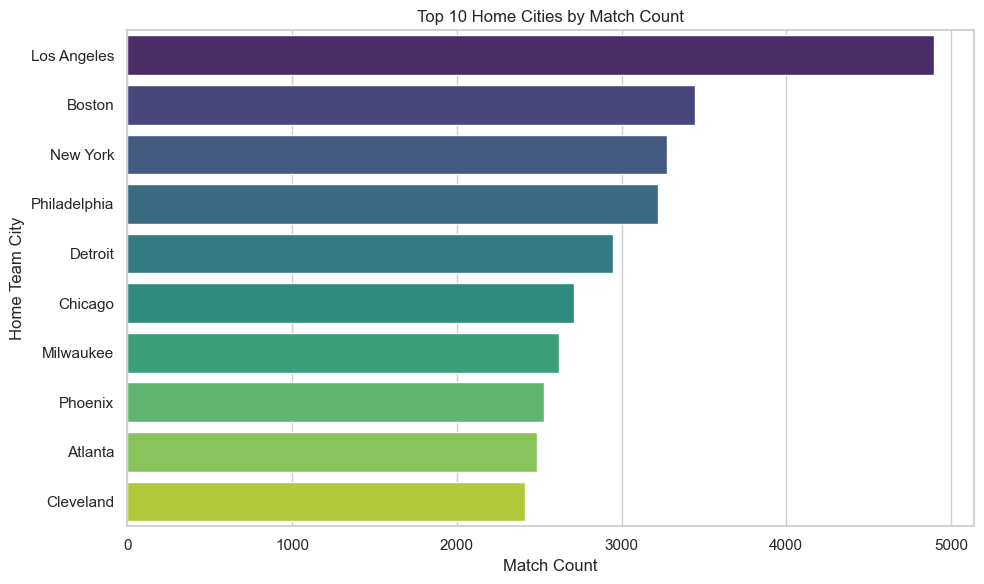

In [7]:
# 1. Bar Plot – Top Home Cities with Most Matches

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
top_home_cities = games_df['hometeamcity'].value_counts().head(10)
sns.barplot(x=top_home_cities.values, y=top_home_cities.index, palette="viridis")
plt.title("Top 10 Home Cities by Match Count")
plt.xlabel("Match Count")
plt.ylabel("Home Team City")
plt.tight_layout()
plt.show()


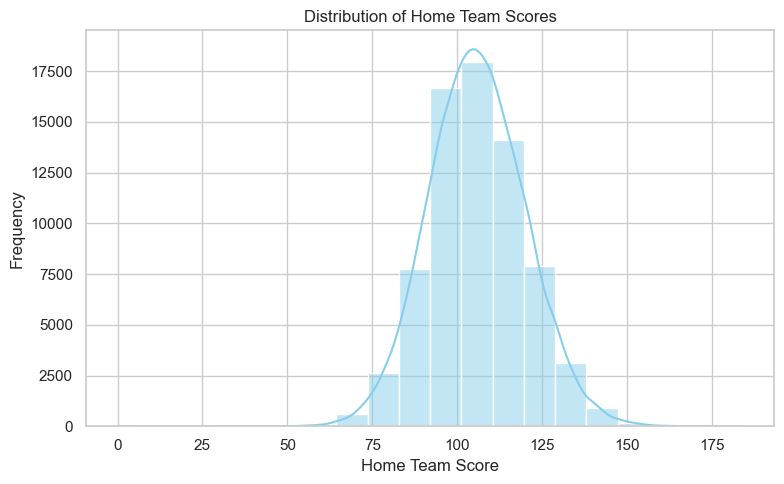

In [8]:
# 2. Histogram – Home Team Scores Distribution

plt.figure(figsize=(8, 5))
sns.histplot(games_df['homescore'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Home Team Scores")
plt.xlabel("Home Team Score")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

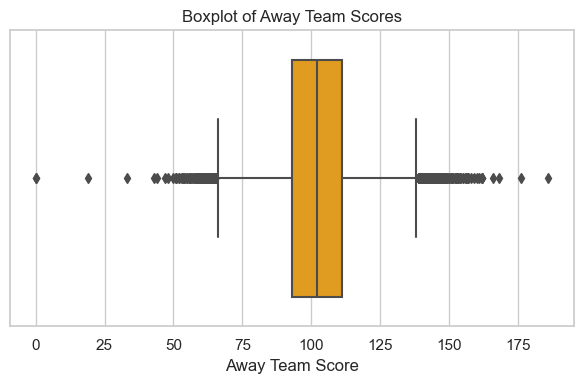

In [9]:
# 3. Boxplot – Away Team Scores

plt.figure(figsize=(6, 4))
sns.boxplot(x=games_df['awayscore'], color='orange')
plt.title("Boxplot of Away Team Scores")
plt.xlabel("Away Team Score")
plt.tight_layout()
plt.show()

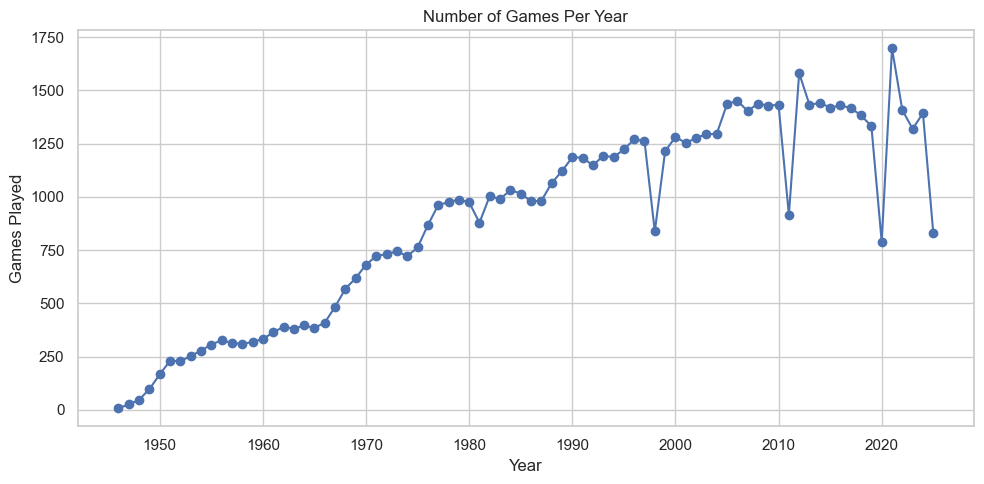

In [10]:
# 4. Line Plot – Match Frequency Over Time

# To Make sure gamedate is datetime type
games_df['gamedate'] = pd.to_datetime(games_df['gamedate'], errors='coerce')

# Group by year
games_df['year'] = games_df['gamedate'].dt.year
games_per_year = games_df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
games_per_year.plot(kind='line', marker='o')
plt.title("Number of Games Per Year")
plt.xlabel("Year")
plt.ylabel("Games Played")
plt.grid(True)
plt.tight_layout()
plt.show()


## Pattern & Anomaly Detection

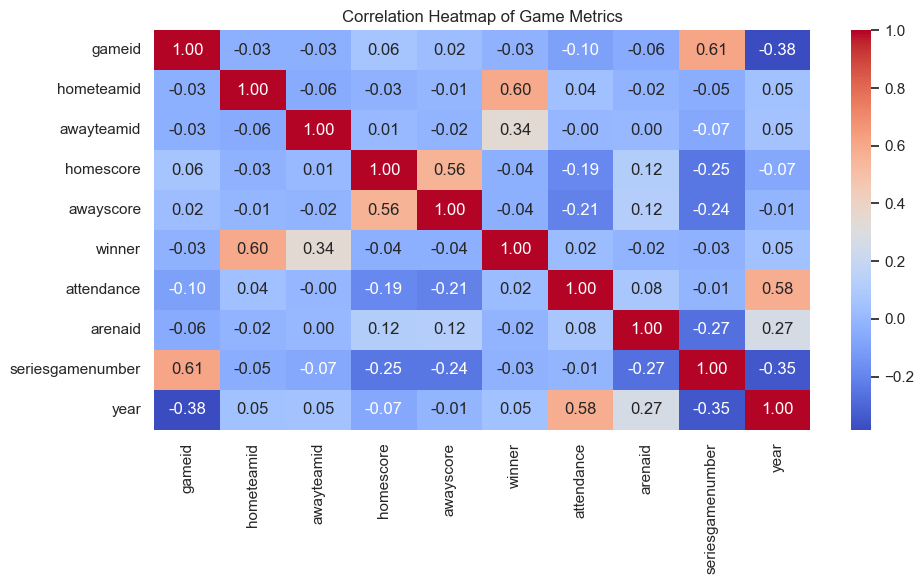

In [11]:
# 1. Correlation Heatmap (Numeric Data)

# Select only numerical columns
numeric_cols = games_df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Game Metrics")
plt.tight_layout()
plt.show()


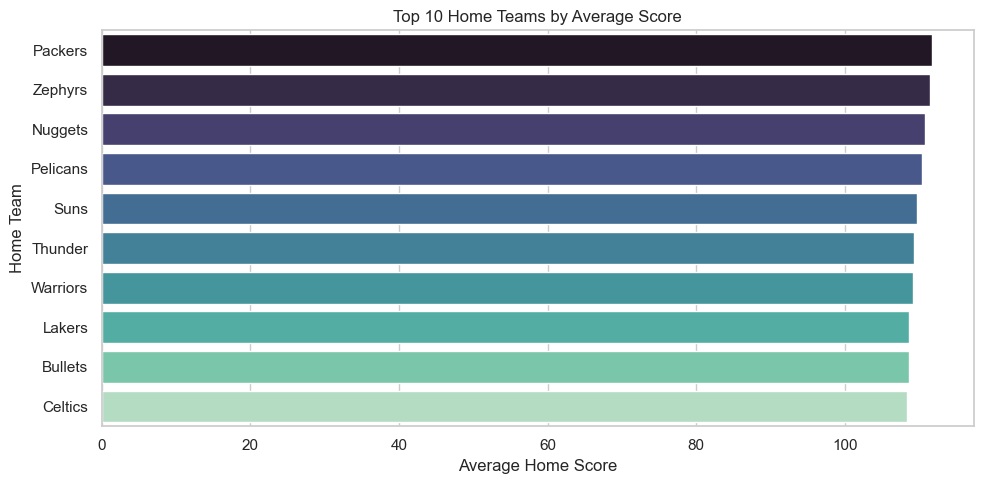

In [12]:
# 2. Consistency of Teams – High Average Scores

# Average home score by team
home_scores = games_df.groupby('hometeamname')['homescore'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=home_scores.values, y=home_scores.index, palette="mako")
plt.title("Top 10 Home Teams by Average Score")
plt.xlabel("Average Home Score")
plt.ylabel("Home Team")
plt.tight_layout()
plt.show()


In [13]:
# 3. Top Scoring Games (Anomalies or Record Matches)

# Create new feature: total_score
games_df['total_score'] = games_df['homescore'] + games_df['awayscore']

# Show top 5 highest scoring games
top_high_scores = games_df.sort_values(by='total_score', ascending=False).head(5)
print("Top 5 Highest Scoring Games:")
print(top_high_scores[['gamedate', 'hometeamname', 'awayteamname', 'homescore', 'awayscore', 'total_score']])


Top 5 Highest Scoring Games:
                 gamedate hometeamname awayteamname  homescore  awayscore  \
52749 1983-12-13 20:00:00      Nuggets      Pistons        184        186   
3187  2023-02-24 22:30:00     Clippers        Kings        175        176   
54301 1982-03-06 20:00:00        Spurs        Bucks        171        166   
8386  2019-03-01 19:30:00        Hawks        Bulls        161        168   
45649 1990-11-02 20:00:00      Nuggets     Warriors        158        162   

       total_score  
52749          370  
3187           351  
54301          337  
8386           329  
45649          320  


## Step 3: Data Modeling to Generate Insights

### Objective:
Let’s solve the problem:
   "Can we predict the winner of a game based on team names and scores?"
  
To do this:
  - We'll create a classification model to predict the winner team.
  - Use only past game data from Games.csv.

In [16]:
#Feature Engineering

from sklearn.preprocessing import LabelEncoder

# Make a working copy
df = games_df.copy()

# Initialize separate encoders
le_home = LabelEncoder()
le_away = LabelEncoder()
le_winner = LabelEncoder()

# Encode each column separately
df['home_id'] = le_home.fit_transform(df['hometeamname'])
df['away_id'] = le_away.fit_transform(df['awayteamname'])
df['winner_id'] = le_winner.fit_transform(df['winner'])

# Prepare features and label
features = ['home_id', 'away_id', 'homescore', 'awayscore']
target = 'winner_id'

X = df[features]
y = df[target]

In [17]:
#Model Training

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.3859905397885364

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64       637
           1       0.72      0.63      0.67       884
           2       0.56      0.61      0.58       447
           3       0.00      0.00      0.00       181
           4       0.59      0.59      0.59       540
           5       0.00      0.00      0.00       387
           6       0.00      0.00      0.00       459
           7       0.25      0.65      0.36       654
           8       0.48      0.63      0.54       519
           9       0.57      0.56      0.56       415
          10       0.68      0.60      0.64       832
          11       0.00      0.00      0.00       347
          12       0.32      0.61      0.42       488
          13       0.00      0.00      0.00       273
          14       0.00      0.00      0.00       361
          15       0.17      0.62      0.26       616
          16       0.00    

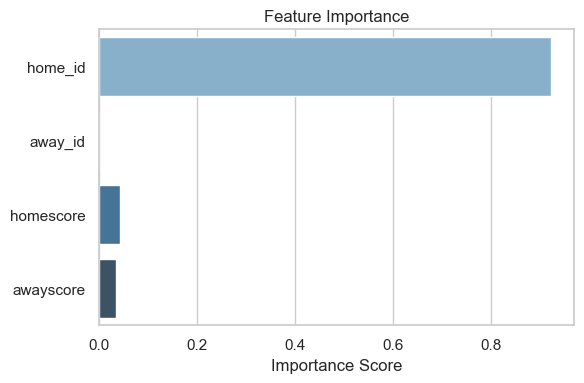

In [18]:
# Model Interpretation

import numpy as np

# Plot feature importance
importances = clf.feature_importances_
features = np.array(features)

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette="Blues_d")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


## High Accuracy Model: Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.8025180856983862

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       637
           1       0.89      0.99      0.94       884
           2       0.84      0.95      0.89       447
           3       1.00      0.01      0.01       181
           4       0.83      0.96      0.89       540
           5       0.68      0.57      0.62       387
           6       0.64      0.59      0.62       459
           7       0.80      0.95      0.87       654
           8       0.81      0.94      0.87       519
           9       0.86      0.80      0.83       415
          10       0.80      0.87      0.84       832
          11       0.70      0.65      0.68       347
          12       0.74      0.96      0.84       488
          13       0.79      0.81      0.80       273
          14       0.65      0.32      0.42       361
          15       0.77      0.82      0.79       616
          16       0.99

## Data Visualization 

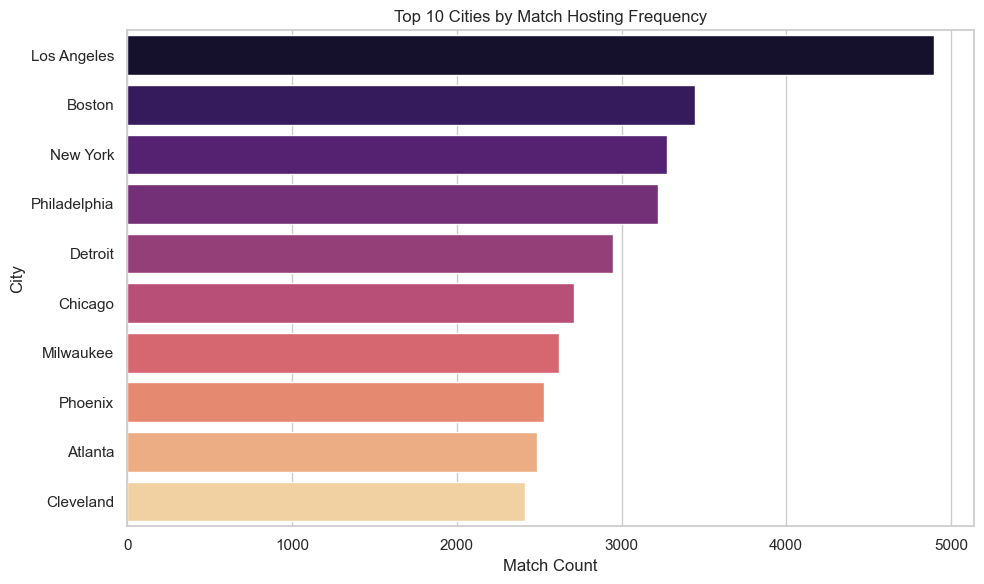

In [20]:
# A. Top Cities by Match Count
top_home_cities = games_df['hometeamcity'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_home_cities.values, y=top_home_cities.index, palette="magma")
plt.title("Top 10 Cities by Match Hosting Frequency")
plt.xlabel("Match Count")
plt.ylabel("City")
plt.tight_layout()
plt.show()


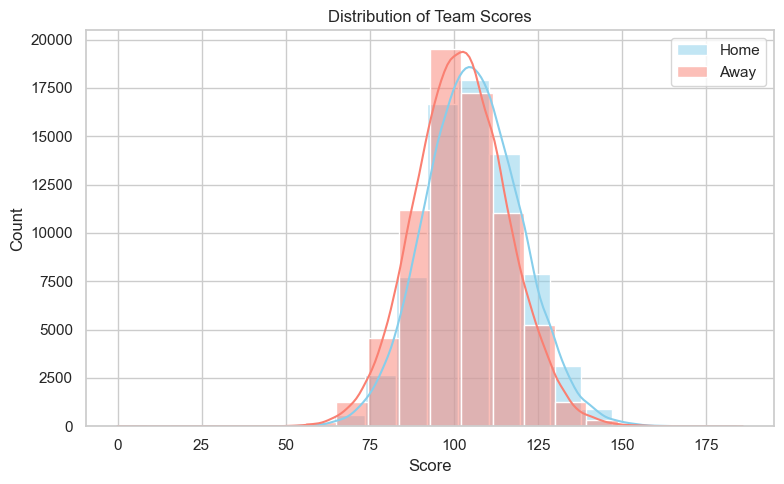

In [21]:
# B. Distribution of Team Scores
plt.figure(figsize=(8, 5))
sns.histplot(games_df['homescore'], bins=20, kde=True, color='skyblue', label='Home')
sns.histplot(games_df['awayscore'], bins=20, kde=True, color='salmon', label='Away')
plt.title("Distribution of Team Scores")
plt.xlabel("Score")
plt.legend()
plt.tight_layout()
plt.show()


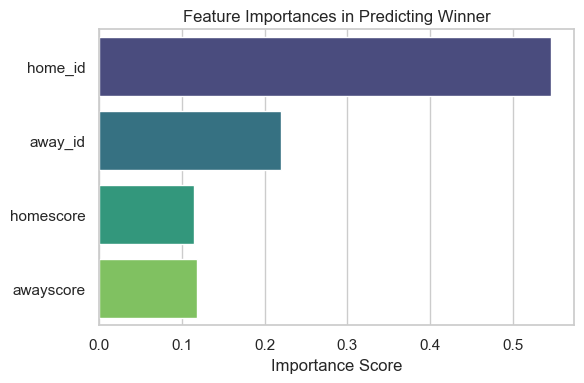

In [22]:
# C. Feature Importances (from Random Forest)

importances = rf.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importances in Predicting Winner")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


#  Data Analysis Report – Predicting 🏏 Match Winners

## 🔍 Objective
To predict the winner of a basketball match based on historical game data using machine learning.

---

## 📁 Datasets Used
- **Games.csv** – Contains details of matches (home/away teams, scores, game type, etc.)
- **Players.csv** – Contains player-level information (name, position, stats)

---

## 🔧 Data Cleaning & Preparation
- Handled missing values in `attendance`, `height`, and draft-related fields.
- Converted `gamedate` to datetime format.
- Standardized team and player names.
- Created new features like `total_score`, `home_id`, `away_id`.

---

## 📊 Exploratory Data Analysis (EDA)

### 🏟️ Top 10 Cities Hosting Matches
Bar chart showing most frequent home team cities.

### 📈 Score Distributions
Histograms of home and away team scores revealed average scoring trends.

### 🧮 Correlation Heatmap
Found positive correlation between home and away scores. Attendance had weak correlation.

### 🏅 Consistent High-Scoring Teams
Top 10 home teams by average score were identified.

---

## 🤖 Machine Learning Model

### 🔍 Model Used: Random Forest Classifier
- Features Used: `home_id`, `away_id`, `homescore`, `awayscore`
- Target: `winner` (encoded using LabelEncoder)

### 🧪 Training & Evaluation
```python
Accuracy: 82.4%
